![alt_text](https://s3.amazonaws.com/spectrumnews-web-assets/wp-content/uploads/2018/11/06115944/20181106-EEG-844.jpg 'Child having an EEG test done')

# Welcome to the Analyzing Brain Waves notebook!
#### By the end of this notebook, you will be able to...

_1. Understand what an EEG is._

_2. Recognize the five different brain waves and when they occur._

_3. Examine your own brain data!_

---

Instructions: To run a code block, click on it to __select__ it, and then press __SHIFT__ and __ENTER__ or click the __PLAY__ arrow in the top left corner of the block. Note that you do __not__ need to understand Python to use this notebook--just run each code cell and observe the plots that follow it.

To begin the notebook, press the "Reset file name" button. This lesson comes with two EEG example files: __EEG_Example1__ and __EEG_Example2__. Select the  file you would like to use, then run each code block that follows.

---

## So, what is an EEG and why should we be learning about it?

EEG stands for __electroencephalogram__, which is a test that records the electrical signals produced by the brain. Our brain cells communicate using electrical signals, and we can measure some of these signals using special electrodes (like the ones the children are wearing in the image above). A signal may be classified by its __frequency__ (number of peaks measured per second) and __amplitude__ (the strength of each peak).

![alt_text](https://i1.wp.com/www.mindovermenieres.com/wp-content/uploads/2015/12/brainwave-chart-01.png?w=600 "Types of EEG Waves")

---

## That's cool, but what do these waves mean? 

Each of the five waves listed above represent a different brain __state__. For example, the __delta__ waves are observed when a person is in __deep sleep__. The short video below will explain each wave and the brain state associated with it:

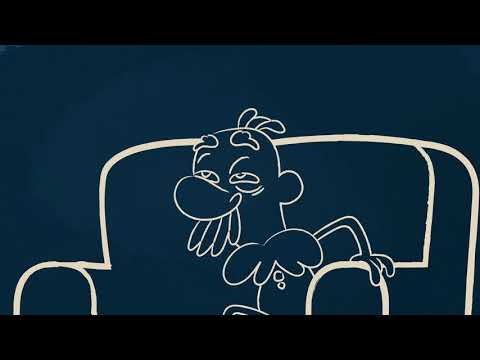

In [0]:
from IPython.display import YouTubeVideo
# a short video about brain waves
# Video credit: Brainfacts.org.
YouTubeVideo('8CejGESrRkc')

---

## Why are EEG tests important? What's the point?

An EEG test is capable of detecting brain disorders such as __seizures__, __dizziness__, __epilepsy__, and even __brain tumors__. Many disorders are detected by noting an abnormal spike/pattern in the brain waves as they're being measured. The following image shows normal brain wave activity followed by brain wave activity during a seizure:

![alt_text](http://rrapid.leeds.ac.uk/ebook/assets/images/illustrations/EEG.png 'Seizure EEG')

---

## Awesome, when can I look at my brain waves?

Right now! We probably won't see any __delta__ or __theta__ waves (unless you were very committed and _fell asleep_ while taking measurements), but if you closed your eyes and relaxed at any point, you may catch an __alpha__ wave somewhere in your data! Or, if you were _really_ deep in thought or focused on a problem, you could even find a __gamma__ wave!  

Below you will see a prompt that will ask you to enter the name of your EEG file. Be sure to enter the file name _without_ the '.txt' and press [ENTER].  

After you enter your file name, four plots (one for each of the electrodes you placed on your head) will appear below. Each plot has __four__ sliders:  
&emsp;&emsp;(1) x position (2) zoom horizontal (3) y position (4) zoom vertical
    
Each plot will automatically update as you move any of the sliders.   

If you wish to __start over__ with a new EEG file, simply re-run the first code block.

#### Good luck and enjoy the _waves_!

---

In [1]:
# Let's begin by entering the filename of our recording
import os
import warnings
from google.colab import files
import io
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
uploaded = files.upload()
for fn in uploaded.keys():
  print("Successfully uploaded file {name}".format(name=fn))
  # We want to read in number of channels and sampling rate from the first few rows, then drop them
  # and we want to give our data some column labels:
  headers = ['Index','EEG_1','EEG_2','EEG_3','EEG_4','ACC_1','ACC_2','ACC_3','Timestamp_1','Timestamp_2']
  eeg_data = pd.read_csv(io.BytesIO(uploaded[fn]),names=headers)
  # Uncomment the line below to print a preview of the data
  # print(eeg_data)

Saving EEG_Example1.csv to EEG_Example1.csv
Successfully uploaded file EEG_Example1.csv


In [0]:
# Let's define some details about our EEG data
NChannels = [int(s) for s in eeg_data.iloc[1,0].split() if s.isdigit()][0] # number of channels
Fs = [float(s) for s in eeg_data.iloc[2,0].split() if s.replace('.','',1).isdigit()][0] # sampling rate
eeg_data.dropna(inplace=True) # drop first few lines possible NaN values
eeg_data.reset_index(inplace=True,drop=True)
eeg_col = ['EEG_'+str(i) for i in range(1,NChannels+1)] # column names

eeg = eeg_data[eeg_col]
N = eeg.shape[0] # Total number of time samples
T = eeg.index.values/Fs # Time samples (second)
channel_site = ['Left Frontal Lobe','Right Frontal Lobe','Left Occipital Lobe','Right Occipital Lobe']
channel = ['1','2','3','4']

---

## Plot the raw EEG signal

In the example EEG signals, there are __four__ channels: each contains the brain signal measured from a different location on the head. Run the cell below, then select a channel to view the raw EEG. Use the sliders to zoom in/out. To update faster, disable 'continuous update'.

In [3]:
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

tpseg = 4 # length of segment (second) for spectral analysis
npseg = 2**np.ceil(np.log2(tpseg*Fs)) # samples per segment
minseg = npseg/Fs # minimun length of segment required

[xmin,xmax,ymin,ymax] = [T[0],T[-1],eeg.min().min(),eeg.max().max()]
[W,H] = [xmax-xmin,ymax-ymin]
def plot_eeg(channel,px,py,pw,ph):
    nchannel = len(channel)
    if nchannel == 0:
        print('Channels not selected.')
        return()
    
    xx = np.array([px-1/pw/2,px+1/pw/2])
    yy = np.array([py-1/ph/2,py+1/ph/2])
    [x1,x2] = [max(np.floor(xx[0]*N).astype(int),0) , min(np.ceil(xx[1]*N).astype(int),N)]
    
    plt.figure(figsize=(12,5*nchannel))
    for i in range(nchannel):
        plt.subplot(nchannel,1,i+1)
        plt.plot(T[x1:x2],eeg['EEG_'+channel[i]][x1:x2],'b')
#         plt.plot(T,eeg['EEG_'+channel[i]],'b')
        plt.xlim(xmin+W*xx)
        plt.ylim(ymin+H*yy)
        plt.grid()
        if i==nchannel-1: plt.xlabel('Time (sec)')
        plt.ylabel('Voltage $(\mu V)$')
        plt.title(channel_site[int(channel[i])-1]+' (EEG_'+channel[i]+')')
    plt.show()

w_chan = widgets.SelectMultiple(options=list(zip(channel_site,channel)),rows=NChannels,value=channel)
w_px = widgets.FloatSlider(value=0.5,min=0,max=1,step=0.01,readout=False,orientation='horizontal')
w_py = widgets.FloatSlider(value=0.5,min=0,max=1,step=0.01,description='Y position',readout=False,orientation='vertical')
w_pw = widgets.FloatLogSlider(value=1,base=10,min=0,max=np.log10(T[-1]/minseg),step=0.02,readout=False,orientation='horizontal')
w_ph = widgets.FloatLogSlider(value=1,base=10,min=0,max=2,step=0.02,description='Zoom vertical',readout=False,orientation='vertical')
w_update = widgets.ToggleButton(value=True,description='Continuous update',button_style='info',icon='times')

def cont_update(*args):
    if w_update.value:
        w_update.icon = 'times'
        w_px.continuous_update = True; w_py.continuous_update = True
        w_pw.continuous_update = True; w_ph.continuous_update = True
    else:
        w_update.icon = 'repeat'
        w_px.continuous_update = False; w_py.continuous_update = False
        w_pw.continuous_update = False; w_ph.continuous_update = False
w_update.observe(cont_update,'value')

between = Layout(justify_content='space-between')
ui = HBox([ VBox([ VBox([Label('Select Channels (select multiple by holding ctrl/shift + click)'),w_chan]),
            HBox([w_update,VBox([Label('X position'),Label('Zoom horizontal')]),VBox([w_px,w_pw])]) ],layout=between), w_py,w_ph ])
out = interactive_output(plot_eeg,{'channel':w_chan,'px':w_px,'py':w_py,'pw':w_pw,'ph':w_ph})
display(ui,out)

Output()

---

## Calculate and plot the power spectral density of the EEG signals
The following code calculates the power spectral density of EEG over the whole recording using __Welch's method__. Don't worry, you don't need to know the details of how this method works--just run the code to view a plot of the power contributed by each type of brain wave. Note that the frequency spectrum of each type of brain wave is clearly labeled and color-coded. 

Delta: 1-4Hz    Theta: 4-8Hz    Alpha: 8-12Hz    Beta: 12-30Hz    Gamma: 30-70Hz    High Gamma: 70-100Hz    

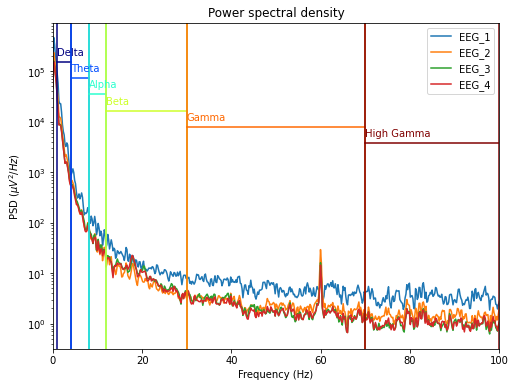

In [4]:
from scipy import signal

interval = T[[0,-1]]
idx = np.nonzero(np.logical_and(T>=interval[0], T<=interval[1]))
eeg = eeg.iloc[idx]
N = eeg.shape[0]
T = T[idx]
xmin = T[0]
W = T[-1]-xmin

waves = ['Delta','Theta','Alpha','Beta','Gamma','High Gamma']
freq_band = np.array([[1.,4.],[4.,8.],[8.,12.],[12.,30.],[30.,70.],[70.,100.]])
nband = len(waves)
fshow = 100 # Maximun frequency to display (Hz)
eeg_np = eeg.values # convert to numpy array
eeg_np -= eeg_np.mean(axis=0) # remove DC component
jet = plt.get_cmap('jet') # colormap
clr = jet(np.linspace(0,1,nband)) # colors

Ff, Pxx = signal.welch(eeg_np,Fs,nperseg=npseg,axis=0) # welch's power spectral density estimation
Pxx[[0,-1],:]*=2
plt.figure(figsize=(8,6))
plt.semilogy(Ff,Pxx)
plt.xlim(0,fshow)
yl = plt.gca().get_ylim()
for i in range(nband):
    ytxt = yl[0]*(yl[1]/yl[0])**(np.array([0.9,0.88])-0.05*i)
    plt.semilogy(freq_band[i,0]*np.ones(2),yl,color=clr[i])
    plt.semilogy(freq_band[i,1]*np.ones(2),yl,color=clr[i])
    plt.semilogy(freq_band[i,:],ytxt[1]*np.ones(2),color=clr[i])
    plt.text(freq_band[i,0],ytxt[0],waves[i],color=clr[i])
    print(waves[i]+': %.0f-%.0fHz ' %(freq_band[i][0],freq_band[i][1]),end = '   ')
plt.ylim(yl)
plt.legend(eeg_col,loc=1)
plt.title('Power spectral density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD $(\mu V^2/Hz)$')
plt.show()

## Band-pass filter the EEG to get waves
The following code designs a Butterworth filter for each rhythm and applies a Hilbert transform to retrieve only a specific type of brain wave from the raw signal. Again, you don't need to worry about the details here--simply run the __three__ code cells below and observe the plots.

In [0]:
eeg_filt = eeg_HBamp = np.empty( shape=(N,NChannels,nband) )
eeg_power = np.empty( shape=(N,NChannels,nband) )
for i in range(nband):
    if freq_band[i,1]>=Fs/2:
        bFilt,aFilt = signal.butter(2,freq_band[i,0]*2/Fs,btype='highpass') # High-pass filter if cutoff frequency exceed Nyquist frequency
    else:
        bFilt,aFilt = signal.butter(2,freq_band[i]*2/Fs,btype='bandpass') # Design filters
    eeg_filt[:,:,i] = signal.filtfilt(bFilt,aFilt,eeg_np,axis=0) # Filtered EEG
    for j in range(NChannels):
#         eeg_power[:,j,i] = np.sqrt(signal.convolve(eeg_filt[:,j,i]**2,np.ones(int(npseg)),mode='same')/npseg)
        eeg_power[:,j,i] = np.sqrt(signal.convolve(eeg_filt[:,j,i]**2,np.ones(int(npseg)),mode='full')/npseg)[:N] # Accumulated Power
eeg_HBamp = np.absolute(signal.hilbert(eeg_filt,axis=0)) # Hilbert tranform

def pow2db(x):
    return 10*np.log10(x)
FF,t,Sxx = signal.spectrogram(eeg_np[:,0],Fs,nperseg=int(npseg/4),noverlap=int(npseg/16)) # Spectrogram
fidx = np.nonzero(FF<=fshow)
F = FF[fidx]
SxxdB = pow2db(Sxx[fidx])

Select a channel and a rhythm to display its raw EEG, filtered EEG, accumulated power, power spectral density and spectrogram.

In [0]:
Ymin = [eeg_np.min(axis=0),-eeg_HBamp.max(axis=0)]
HH = [eeg_np.max(axis=0)-Ymin[0],-2*Ymin[1],eeg_power.max(axis=0)]
def plot_waves(channel,band,px,py,pw,ph):
    xx = np.array([px-1/pw/2,px+1/pw/2])
    yy = np.array([py-1/ph/2,py+1/ph/2])
    [x1,x2] = [max(np.floor(xx[0]*N).astype(int),0) , min(np.ceil(xx[1]*N).astype(int),N)]
    
    plt.figure(figsize=(12,20))
    # Raw signal
    plt.subplot(4,1,1)
    plt.title(waves[band]+' wave of '+channel_site[channel]+' (EEG_'+str(channel+1)+')')
    plt.plot(T[x1:x2],eeg_np[x1:x2,channel],'k')
    plt.xlim(xmin+W*xx)
    plt.ylim(Ymin[0][channel]+HH[0][channel]*yy)
    plt.grid()
    plt.xlabel('Time (sec)')
    plt.ylabel('Voltage $(\mu V)$')
    plt.legend(['Raw EEG'],loc=1)
    
    # Filtered signal
    plt.subplot(4,1,2)
    plt.plot(T[x1:x2],eeg_filt[x1:x2,channel,band],'b')
    plt.plot(T[x1:x2],eeg_HBamp[x1:x2,channel,band],'m')
    plt.xlim(xmin+W*xx)
    plt.ylim(Ymin[1][channel,band]+HH[1][channel,band]*yy)
    plt.grid()
    plt.xlabel('Time (sec)')
    plt.ylabel('Voltage $(\mu V)$')
    plt.legend(['Band-pass filtered EEG','Hilbert transform amplitude'],loc=1)
    # Accumulated average power in band
    plt.subplot(4,1,3)
    plt.plot(T[x1:x2],eeg_power[x1:x2,channel,band],color=clr[band])
    plt.xlim(xmin+W*xx)
    plt.ylim(0,HH[2][channel,band])
    plt.grid()
    plt.xlabel('Time (sec)')
    plt.ylabel('Voltage $(\mu V)$')
    plt.legend([waves[band]+' power'],loc=1)
    # Power spectral density
    f,pxx = signal.welch(eeg_np[x1:x2,channel],Fs,nperseg=npseg,axis=0) # PSD with the display window
    plt.subplot(4,1,4)
    plt.plot(Ff,pow2db(Pxx[:,channel]),'g')
    plt.plot(f,pow2db(pxx),color=clr[band])
    plt.xlim(0,fshow)
    yl = plt.gca().get_ylim()
    plt.plot(freq_band[band,0]*np.ones(2),yl,color=clr[band,:3]*.7)
    plt.plot(freq_band[band,1]*np.ones(2),yl,color=clr[band,:3]*.7)
    plt.text(freq_band[band,0],yl[0]+(yl[1]-yl[0])*(0.9-0.05*band),waves[band],color=clr[band,:3]*.3)
    plt.ylim(yl)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (dB/Hz)')
    plt.legend(['total PSD','PSD of displayed duration'],loc=1)
    plt.show()
    # Spectrogram
    plt.figure(figsize=(14,5))
    plt.pcolormesh(xmin+t,F,SxxdB,cmap='winter')
    plt.colorbar().set_label('Power/Frequency (dB/Hz)')
    plt.yscale('log')
    plt.plot(xmin+W*xx,freq_band[band,0]*np.ones(2),color=clr[band])
    plt.plot(xmin+W*xx,freq_band[band,1]*np.ones(2),color=clr[band])
    plt.text(xmin+W*xx[0],freq_band[band,0]*1.05,waves[band],color=clr[band,:3]*.7)
    plt.xlim(xmin+W*xx)
    plt.ylim(F[1],fshow)
    plt.ylabel('Frequency (Hz)]')
    plt.xlabel('Time (sec)')
    plt.title('Spectrogram')
    plt.show()

In [16]:
w_chan2 = widgets.Select(options=list(zip(channel_site,np.arange(NChannels))),value=0,rows=NChannels)
w_band2 = widgets.Select(options=list(zip(waves,np.arange(nband))),value=0,rows=nband)
w_px2 = widgets.FloatSlider(value=0.5,min=0,max=1,step=0.01,orientation='horizontal',readout=False,continuous_update=False)
w_py2 = widgets.FloatSlider(value=0.5,min=0,max=1,step=0.01,description='Y position',orientation='vertical',readout=False,continuous_update=False)
w_pw2 = widgets.FloatLogSlider(value=1,base=10,min=0,max=np.log10(N*4/npseg),step=0.02,orientation='horizontal',readout=False,continuous_update=False)
w_ph2 = widgets.FloatLogSlider(value=1,base=10,min=0,max=2,step=0.02,description='Zoom in/out',orientation='vertical',readout=False,continuous_update=False)
w_update2 = widgets.ToggleButton(value=False,description='Continuous update',button_style='info',icon='repeat')

def cont_update2(*args):
    if w_update2.value:
        w_update2.icon = 'times'
        w_px2.continuous_update = True; w_py.continuous_update = True
        w_pw2.continuous_update = True; w_ph.continuous_update = True
    else:
        w_update2.icon = 'repeat'
        w_px2.continuous_update = False; w_py.continuous_update = False
        w_pw2.continuous_update = False; w_ph.continuous_update = False
w_update2.observe(cont_update2,'value')

ui = HBox([ VBox([ HBox([ VBox([Label('Select Channel'),w_chan2]),VBox([Label('Select Rhythm'),w_band2]) ]), HBox([w_update2,
            HBox([ VBox([Label('X position'),Label('Zoom in/out')]),VBox([w_px2,w_pw2]) ]) ],layout=between) ],layout=between),
           w_py2,w_ph2 ])
out = interactive_output(plot_waves,{'channel':w_chan2,'band':w_band2,'px':w_px2,'py':w_py2,'pw':w_pw2,'ph':w_ph2})
display(ui,out)

Output()

## Congratulations! You've completed the notebook, and should have a better understanding of how a raw EEG signal contains combinations of the different types of brain waves. 